In [1]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

#import matplotlib.pyplot as plt
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

import numpy as np
import scipy.linalg as la
import math
from itertools import product
from itertools import permutations
from decimal import *

import ba_functions as f

# Plots

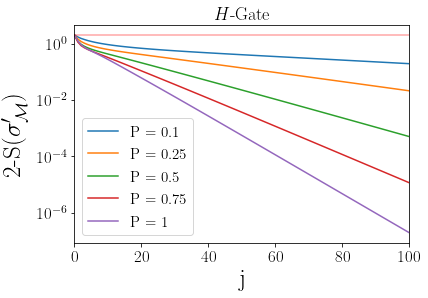

In [13]:
# V.N. Entropy Plot vs. Noise Probability P

# Plot with different values of P for gate Instruction #0 (H gate)
# [0] means "first returned argument of g()" --> z (Von Neumann Entropy)
# [1] means "second returned argument of g()" --> sgma (noisy)

N = 2
sgma = f.init(N)
J=100

# Noise probability values 
noise = [.1,.25,.5,.75,1]

for p in noise:
    plt.semilogy(N-f.g(sgma,0,J,p,N)[0],label="P = " + str(p))
    plt.legend()
    # uses only instruction #0 -> H-gate

plt.title("$H$-Gate",fontsize=18)
plt.xlim(0,J)
plt.axhline(N,0,1,color="red",alpha=.35)
plt.xlabel("j",fontsize=25)
plt.ylabel("%d-S($\sigma'_\mathcal{M}$)"%N,fontsize=25)

plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.legend(prop={'size': 15})

#plt.savefig("S_J100_N2_P.png",bbox_inches="tight",dpi=200)

Text(0,0.5,'S(sgma)')

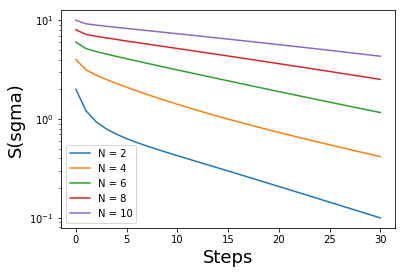

In [3]:
# V.N. Entropy Plot vs. Qubit Number N
    
p = .5

# Memory Size in qubits
qbits = [2,4,6,8,10]

for n in qbits:
    N = n
    sgma = f.init(N)
    plt.semilogy(N-f.g(sgma,0,30,p,N)[0],label="N = " + str(N))
    plt.legend()
    # uses only instruction #0 -> H-gate

plt.xlabel("Steps",fontsize=18)
plt.ylabel("S(sgma)",fontsize=18)

# Larger systems get mixed slower, because more operations are needed to mix the state
# due to a larger the larger computational depth.
# Note that we use U gates that have dim(U)_max = 4x4.
# -> It pays off to use larger N !!! (check the fidelity!)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


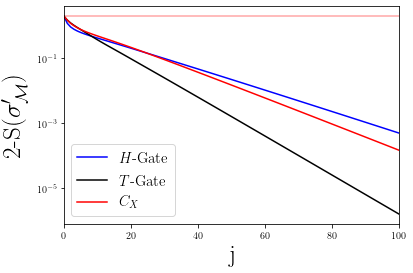

In [2]:
# V.N. entropy Plot
# Plot with different gates instructions H, Pi8 and CNOT for fixed J and p
# Same gate is always applied, but the noisy channel mixes the memory

#Starting from Initial State (fiducial state)

N = 2
sgma = f.init(N)

#Starting from a random state

#ps=np.random.randn(2**N,2**N)
#ps/=np.linalg.norm(ps)
#sgma=np.reshape(np.transpose(ps) @ ps,[2 for i in range(2*N)])

p =0.5
J = 100

plt.semilogy(N-f.g(sgma,0,J,p,N)[0],color="blue", label="$H$-Gate")
plt.plot(N-f.g(sgma,N,J,p,N)[0],color="black",label="$T$-Gate")
plt.plot(N-f.g(sgma,2*N,J,p,N)[0],color="red",label="$C_X$")

#plt.title("Von Neumann Entropy",fontsize=18)
plt.xlim(0,J)
plt.legend()
plt.axhline(N,0,1,color="red",alpha=.35)
plt.xlabel("j",fontsize=25)
plt.ylabel("%d-S($\sigma'_\mathcal{M}$)"%N,fontsize=25)

plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.legend(prop={'size': 15})

# Observations:
# Weighting H more leads to faster mixed state (at early steps).
# --> Because Pi8 and Cnot initialy leave mixed state invariant.
#     Weighting them more results in a state that is less mixed

# Pi_8 and CNOT lines cross (at early times) when are they equal?
# for N = 5 H and Pi8 behave the same why?
#plt.savefig("S_J20_N2_p05_Gates.png",bbox_inches="tight",dpi=200)

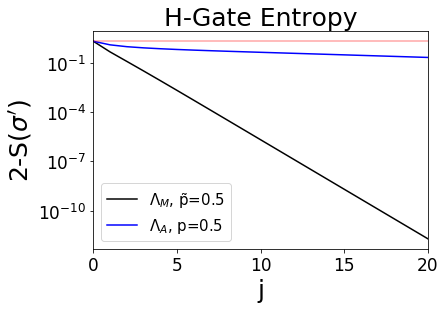

In [198]:
p = .5
Pm = .5

J = 20
N = 2
sgma = f.init(N)

getcontext().prec = 28
lmbda0 = [(1-(1-Pm)**j)/(2**N) for j in range(J+1)]
lmbda1 = [(1-Pm)**j+(1-(1-Pm)**j)/(2**N) for j in range(J+1) ]

S = [N+lmbda1[j]*math.log(lmbda1[j],2)+(2**N-1)*lmbda0[j]*math.log(lmbda0[j],2) if j!=0 else N for j in range(J+1) ]

plt.semilogy(S,color="black", label="$\Lambda_M$, p̃=0.5")
plt.plot(N-f.g(sgma,0,J,p,N)[0],color="blue", label="$\Lambda_A$, p=0.5")

#exp_numfit = [.9-.9*(1-np.exp(-slope_num[60]*x)) for x in range(J) ]
#plt.plot(exp_numfit,color="red", label="Fit")

plt.xlim(0,J)
#plt.ylim(0.001,1)
plt.legend()
plt.axhline(N,0,1,color="red",alpha=.35)
plt.xlabel("j",fontsize=25)
plt.ylabel("%d-S($\sigma'$)"%N,fontsize=25)
plt.title("H-Gate Entropy",fontsize=25)

plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.legend(prop={'size': 15})

plt.savefig("S_J20_N2_p05P05_Ana.png",bbox_inches="tight",dpi=200)

In [15]:
def S_an(j,Pm,N):
    lmbda0 = (1-(1-Pm)**j)/(2**N)
    lmbda1 = (1-Pm)**j+(1-(1-Pm)**j)/(2**N)
    S = N+lmbda1*np.log2(lmbda1)+(2**N-1)*lmbda0*np.log2(lmbda0)
    return S

Text(0,0.5,'k(p)')

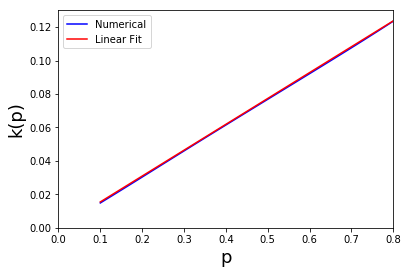

In [57]:
# Slope vs p
J=180

prob_slope = np.arange(.1,.81,.01)

slope_num = [(-np.log(N-f.g(sgma,0,J,p,N)[0][175])+np.log(N-f.g(sgma,0,J,p,N)[0][100]))/75 for p in prob_slope]
slope_ana = [(-np.log(S_an(10,p,N))+np.log(S_an(5,p,N)))/5 for p in prob_slope]

slope_fit = [slope*p for p in prob_slope]

plt.xlim(0,.8)
plt.ylim(0,.13)
plt.plot(prob_slope,slope_num,label="Numerical",color="blue")
plt.plot(prob_slope,slope_fit,label="Linear Fit",color="red")
#plt.plot(prob_slope,slope_ana)
#plt.axhline(slope_num[40],0,1,hold=None,color="red",linestyle="--",alpha=.35)
#plt.axvline(.4,0,.7,color="gray",linestyle=":",label="p (Channel)")
#plt.axvline(.029,0,.7,color="gray",linestyle="--",label="p (Mem.Depol.Approx)")
plt.legend()
plt.xlabel("p",fontsize=18)
plt.ylabel("k(p)",fontsize=18)
#plt.savefig("k(p)_Ana.png",bbox_inches="tight",dpi=200)

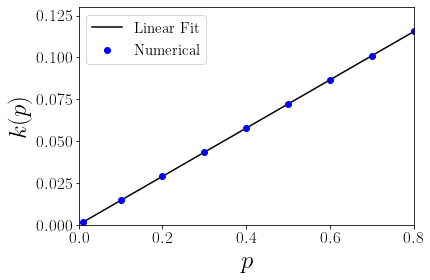

In [27]:
# Slope vs p
J1=1000
J2=800
J1_ana=200
J2_ana=150
N=2
sgma=f.init(N)

prob_slope = [.01,.1,.2,.3,.4,.5,.6,.7,.8]
prob_slope_ana = np.arange(.01,.15,.01)
slope_num = np.zeros(9)
slope_ana = np.zeros(14)
i=0

for p in prob_slope:
    step1 = round(J1/(100*p))
    step2 = round(J2/(100*p))
    slope_num[i] = (-np.log(N-f.g(sgma,0,step1,p,N)[0][step1])+np.log(N-f.g(sgma,0,step2,p,N)[0][step2]))/(step1-step2)
    i+=1
i=0
for p in prob_slope_ana:
    step1 = round(J1_ana/(100*p))
    step2 = round(J2_ana/(100*p))
    slope_ana[i] = (-np.log(S_an(10,p,N))+np.log(S_an(5,p,N)))/5
    i+=1

slope_fit = [slope*p for p in prob_slope]

plt.xlim(0,.8)
plt.ylim(0,.13)

plt.plot(prob_slope,slope_fit,color="black",label="Linear Fit")
plt.plot(prob_slope,slope_num,"bo",label="Numerical")
#plt.plot(prob_slope_ana,slope_ana,"yo",label="Ana")
#plt.plot(prob_slope,slope_ana)
#plt.axhline(slope_num[40],0,1,hold=None,color="red",linestyle="--",alpha=.35)
#plt.axvline(.4,0,.7,color="gray",linestyle=":",label="p (Channel)")
#plt.axvline(.029,0,.7,color="gray",linestyle="--",label="p (Mem.Depol.Approx)")
plt.legend()
plt.legend(prop={'size': 15})
plt.rc('xtick',labelsize=17)
plt.rc('ytick',labelsize=17)
plt.xlabel("$p$",fontsize=25)
plt.ylabel("$k(p)$",fontsize=25)
#plt.savefig("k(p)_Ana.png",bbox_inches="tight",dpi=200)

In [26]:
error = np.zeros(9)
fitError = 0

for i in range(9):
    error[i]=(slope_num[i]-slope_fit[i])**2
    fitError += error[i]

print(fitError/9)

6.620604419900738e-08


In [17]:
a=prob_slope[8]-prob_slope[1]
b=slope_num[8]-slope_num[1]
slope = b/a

print(slope)

0.1441588736287041


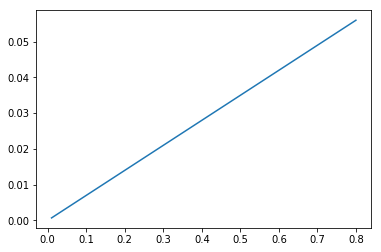

In [15]:
# Getting the new p for the approx in memory as depol. channel
slope_p_ana = slope_ana[13]/prob_slope_ana[13]
slope_p_num = slope

p_approx = [slope_p_num*p/slope_p_ana for p in prob_slope]
plt.plot(prob_slope,p_approx)

In [16]:
print(prob_slope[4])
print(p_approx[4])

0.4
0.0279806755966


0.921412904547
[[ 0.78729472  0.          0.          0.        ]
 [ 0.          0.07090176  0.          0.        ]
 [ 0.          0.          0.07090176  0.        ]
 [ 0.          0.          0.          0.07090176]]

[[ 0.61502095  0.12503112  0.12846786  0.06270118]
 [ 0.12503112  0.14279072  0.03554352  0.02340548]
 [ 0.12846786  0.03554352  0.14694579  0.02343977]
 [ 0.06270118  0.02340548  0.02343977  0.09524254]]


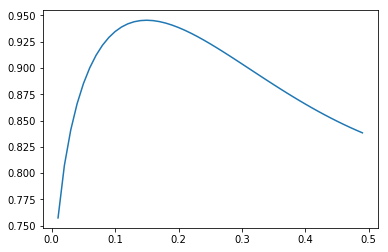

In [17]:
# Fidelity for two mixed states

def F_mixed(A,B):
    A_sqrt = la.sqrtm(A)
    C = la.sqrtm(A_sqrt@B@A_sqrt)
    res = np.trace(C)**2
    return np.real(res)

def F_num_ana(N,J,p,pm):
    sgma = f.init(N)
    A = f.g(sgma,0,J,p,N)[1]
    A = A.reshape(2**N,2**N)

    for i in range(J):
        sgma = f.f(sgma,h,[0],N)
    
    sgma = sgma.reshape(2**N,2**N)
    B = ((1-pm)**J)*sgma + (1-(1-pm)**J)/(2**N)*np.identity(2**N)
    return np.real(F_mixed(A,B))

N = 2
J = 4
p = 0.99
pm = 0.08

h = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])

sgma = f.init(N)
A = f.g(sgma,0,J,p,N)[1]
A = A.reshape(2**N,2**N)

for i in range(J):
    sgma = f.f(sgma,h,[0],N)
    
sgma = sgma.reshape(2**N,2**N)
B = ((1-pm)**J)*sgma + (1-(1-pm)**J)/(2**N)*np.identity(2**N)

print(F_mixed(A,B))

Fidel_plot = [F_num_ana(N,J,p,pm) for pm in np.arange(0.01,.5,.01)]
print(B)
print()
print(np.real(A))
plt.plot(np.arange(0.01,.5,.01),Fidel_plot)

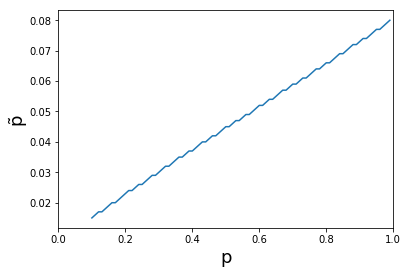

In [15]:
p_range = np.arange(.1,1,.01)
pm_range = np.arange(0.01,.1,.001)
ana_val = np.zeros(len(p_range))
i=0

N=2
J=100

for p in p_range:
    Fidel_plot = [F_num_ana(N,J,p,pm) for pm in pm_range]
    max_val = np.max(Fidel_plot)
    max_ind = Fidel_plot.index(max_val)
    ana_val[i] = pm_range[max_ind]
    i+=1

plt.plot(p_range,ana_val)
plt.xlim(0,1)
plt.xlabel("p",fontsize=18)
plt.ylabel("p̃",fontsize=18)
#plt.savefig("PmvsP_F.png",bbox_inches="tight",dpi=200)

#pm=0.13 will intersect with p=0.4 at J=5?

In [79]:
print()

#print(p_range)
#print(ana_val)

[ 0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21
  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33
  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45
  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57
  0.58  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69
  0.7   0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81
  0.82  0.83  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93
  0.94  0.95  0.96  0.97  0.98  0.99]
[ 0.015  0.016  0.017  0.017  0.018  0.019  0.02   0.02   0.021  0.022
  0.023  0.024  0.024  0.025  0.026  0.026  0.027  0.028  0.029  0.029
  0.03   0.031  0.032  0.032  0.033  0.034  0.035  0.035  0.036  0.037
  0.037  0.038  0.039  0.04   0.04   0.041  0.042  0.042  0.043  0.044
  0.045  0.045  0.046  0.047  0.047  0.048  0.049  0.049  0.05   0.051
  0.052  0.052  0.053  0.054  0.054  0.055  0.056  0.057  0.057  0.058
  0.059  0.059  0.06   0.

Text(0,0.5,'N-S(sgma)')

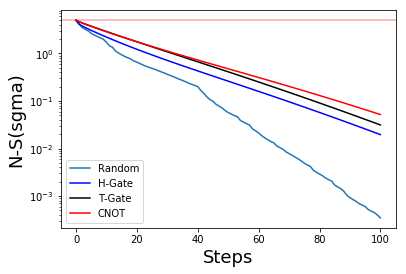

In [5]:
# plot #"fN" random Instructons and fN =1 (random) vs H,Pi8,CNOT for J steps

J = 100
p = .5

y = np.zeros(J+1)

fN = 1

for i in range(fN):
    sgma = f.init(N)
    for step in range(J):

        inst = np.random.randint(0,N*(N+1))
        y[step+1] = f.g(sgma,inst,1,p,N)[0][1]
        sgma = f.g(sgma,inst,1,p,N)[1]

    plt.semilogy(N-y,label="Random")

sgma = f.init(N)
plt.plot(N-f.g(sgma,0,J,p,N)[0],color="blue",label="H-Gate")
plt.plot(N-f.g(sgma,N,J,p,N)[0],color="black",label="T-Gate")
plt.plot(N-f.g(sgma,2*N,J,p,N)[0],color="red",label="CNOT")

plt.legend()
plt.axhline(N,0,1,hold=None,color="red",alpha=.35)
plt.xlabel("Steps",fontsize=18)
plt.ylabel("N-S(sgma)",fontsize=18)


# Plot for Bell & GHZ

0.44875
0.364838794896


/home/chronos/MyWorkspace/jupyter-workspace/BA/ba_functions.py:106: RuntimeWarning: invalid value encountered in log2
  z[step+1] = sum(-s*np.log2(s) for s in EV.real if s != 0)


Text(0,0.5,'Fidelity (F)')

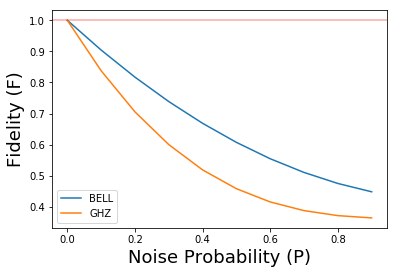

In [3]:
# Fidelity Plot

p = np.arange(0,1.,0.1)

N=2
res = [f.bellFid(prob) for prob in p]
res = np.real(res)
print(res[9])
plt.plot(p,res,label="BELL")

N=3
res = [f.ghzFid(prob) for prob in p]
res = np.real(res)
print(res[9])
plt.plot(p,res,label="GHZ")

plt.legend()
plt.axhline(1,0,1,hold=None,color="red",alpha=.35)
plt.xlabel("Noise Probability (P)",fontsize=18)
plt.ylabel("Fidelity (F)",fontsize=18)

# Bell Circuit Entropy S(n) of the reduced state

In [239]:
N=3
J=100
prob = np.arange(0.001,1.,0.01)
z1=np.zeros(len(prob))
z2=np.zeros(len(prob))

i=0
for p in prob:
    sgma = f.init(N)
    sgma = f.g(sgma,0,1,p,N)[1] # Instruction "0": H on qubit 0
    sgma_res = f.g(sgma,2*N,J,p,N)[1] # Instruction "2*N": CNOT on qubits [0,1]
    sgma_z = f.g(sgma,2*N,J,p,N)[0][J]
    z1[i] = sgma_z
    sgma_res = f.partial_trace(sgma_res,[0,1],[2 for i in range(N)]) # Reduced State
    EV2 = la.eigvals(sgma_res)
    z2[i] = sum(-s*np.log2(s) for s in EV2.real if s != 0)
    i+=1
    # Entropy of the State after the 2-step computation
    #print("Complet State: %.4f | Reduced State: %.4f"%(z1[0],z2[0]))

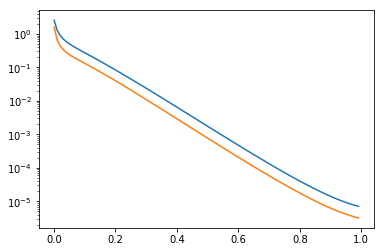

In [258]:
plt.semilogy(prob,3-z1)
plt.semilogy(prob,2-z2)
#y = max(z1)
#x = (np.where(z1==max(z1))[0]+1)*0.01+.001
#plt.plot(x,y,'ro')

# Note that there exists a global Maximum.
# However this is only for 2 steps! There is no global max for larger J.
# Goes assymptotically to: S(J) -> N for larger J
# For computations of small J we get the effect of a global max.
# Disappears for useful computations, usually big J 
# Interestingly the reduced state reaches a larger relative Entropy, may be due to the partial trace reduction.

In [ ]:
# plt.xlim(0,100)
# Next check the fidelity of the bell circuit, add lures (J steps) and compare with
# analytical lower bound.

In [11]:
N = 2
p=.5
g = N*(N+1)
inst = [0,1]

lbda = (p/g)*np.ones(g)

for i in inst:
    lbda[i] += (1-p) 

print(lbda)

# g_lure[]..... done 
###################################################
# Now: 
#     Bell Circuit with instruction noise (only)
#     Bell Circuit with lure noise (only)
#     Bell Circuit with memory noise (only)
#     Combine Inst and Lure noise
#     Combine Inst and Lure noise & memory noise
###################################################

[ 0.58333333  0.58333333  0.08333333  0.08333333  0.08333333  0.08333333]


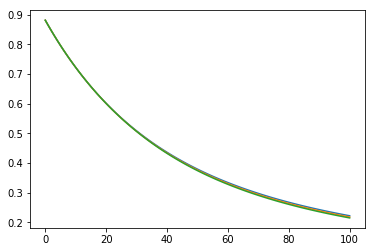

In [37]:
pi8 = np.array([[1,0],[0,np.exp(-1j/4*np.pi)]])
h = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
Cx = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
CNOT = np.reshape(Cx,[2,2,2,2])
v0 = np.array([1,0])
v1 = np.array([0,1])


N = 4
p=.1

sgma = f.init(N)

# generate N-Memory
v_sgma = v0
for i in range(N-1):
    v_sgma = np.kron(v_sgma,v0)


# Noiseless memory state#####################

# Bell Circuit
# consider input states 00, 01, 10, 11
Inst = [[0,[0]],	# H on qbit [0]          "0"=H, "1"=T, "2"=CNOT
        [2,[0,1]]]	# CNOT on qubits [0,1]
    
clean_vec = f.noiseless(v_sgma,Inst,N)


# Noise from INSTRUCTIONS#####################

# "0" H on qubit 0
# "2*N" Cx(0,1)
# g(sgma,inst,J,p,N)
sgma = f.g_lure(sgma,[0],1,p,N)[1]       # Hadamard
sgma = f.g_lure(sgma,[2*N],1,p,N)[1]     # CNOT
print(f.fidelity(clean_vec,sgma,N).real)


# Noise from LURES

lureNumber = 100
Fid33 = np.zeros(lureNumber+1)
Fid33[0] = f.fidelity(clean_vec,sgma,N).real

for j in range(lureNumber):
    sgma2 = f.g_lure(sgma,[2*N-1,2*N-2],1,p,N)[1]  # Lure Pi_8 on qubit 2 and 3 of (0,1,2,3)
    Fid33[j+1] = f.fidelity(clean_vec,sgma2,N).real
    #print(Fid[j])
    sgma = sgma2
    
#print(f.fidelity(clean_vec,sgma2,N).real)

# Get Fidelity
# print(f.fidelity(clean_vec,sgma,N))
# print(f.fidelity(clean_vec,sgma2,N))


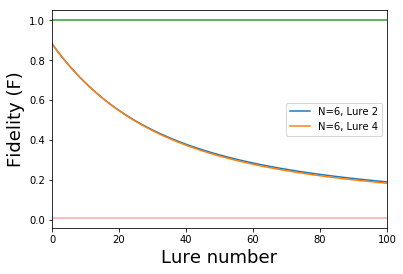

In [47]:
#plt.plot(Fid,label="N=4")
plt.plot(Fid2,label="N=6, Lure 2")
plt.plot(Fid22,label="N=6, Lure 4")
#plt.plot(Fid3,label="N=8")
plt.legend()

plt.xlabel("Lure number",fontsize=18)
plt.ylabel("Fidelity (F)",fontsize=18)

# Cheating probability
cheatP = 1
cheat = np.zeros(lureNumber+1)
cheat[0]=1

for j in range(lureNumber):
    cheatP = cheatP**(2*(j+1)/(j+3))
    cheat[j+1]=cheatP

plt.plot(cheat,label="Cheat")

plt.xlim(0,100)
plt.axhline(.01,0,1,hold=None,color="red",alpha=.35)
    

In [39]:
print(Fid3[100])
print(Fid32[100])
print(Fid33[100])

0.222226005093
0.218308380199
0.215021056804


In [2]:
pi8 = np.array([[1,0],[0,np.exp(-1j/4*np.pi)]])
h = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
Cx = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
CNOT = np.reshape(Cx,[2,2,2,2])
v0 = np.array([1,0])
v1 = np.array([0,1])


N=2
p=.01


sgma = f.init(N)

v_sgma=np.kron(v0,v0)

# generate N-Memory
#v_sgma = v0
#for i in range(N-1):
#    v_sgma = np.kron(v_sgma,v0)


# Noiseless memory state#####################

# Bell Circuit
# consider input states 00, 01, 10, 11
#00
Inst00 = [[0,[0]],  # H on qbit [0]          "0"=H, "1"=T, "2"=CNOT
          [2,[0,1]]]	# CNOT on qubits [0,1]

#01
Inst01 = [[0,[0]],
          [0,[1]],
          [1,[1]],
          [1,[1]],
          [1,[1]],
          [1,[1]],
          [0,[1]],
          [2,[0,1]]]

#10
Inst10 = [[0,[0]],
          [1,[0]],
          [1,[0]],
          [1,[0]],
          [1,[0]],
          [2,[0,1]]]

#11
Inst11 = [[0,[0]],#H0
          [1,[0]],#T0
          [1,[0]],#T0
          [1,[0]],#T0
          [1,[0]],#T0
          [0,[1]],#H1
          [1,[1]],#T1
          [1,[1]],#T1
          [1,[1]],#T1
          [1,[1]],#T1
          [0,[1]],#H1
          [2,[0,1]]]#CNOT(0,1)


    
clean_vec_00 = f.noiseless(v_sgma,Inst00,2)
clean_vec_01 = f.noiseless(v_sgma,Inst01,2)
clean_vec_10 = f.noiseless(v_sgma,Inst10,2)
clean_vec_11 = f.noiseless(v_sgma,Inst11,2)

# Noise from INSTRUCTIONS#####################

# "0" H on qubit 0
# "2*N" Cx(0,1)
# g(sgma,inst,J,p,N)

#00
sgma_00 = f.g_lure(sgma,[0],1,p,N)[1]#H0
sgma_00 = f.g_lure(sgma_00,[2*N],1,p,N)[1]#CNOT

#01
sgma_01 = f.g_lure(sgma,[0],1,p,N)[1]
sgma_01 = f.g_lure(sgma_01,[1],1,p,N)[1]#H1
sgma_01 = f.g_lure(sgma_01,[N+1],1,p,N)[1]#T1
sgma_01 = f.g_lure(sgma_01,[N+1],1,p,N)[1]#T1
sgma_01 = f.g_lure(sgma_01,[N+1],1,p,N)[1]#T1
sgma_01 = f.g_lure(sgma_01,[N+1],1,p,N)[1]#T1
sgma_01 = f.g_lure(sgma_01,[1],1,p,N)[1]#H1
sgma_01 = f.g_lure(sgma_01,[2*N],1,p,N)[1]#CNOT

#10
sgma_10 = f.g_lure(sgma,[0],1,p,N)[1]#H0
sgma_10 = f.g_lure(sgma_10,[N],1,p,N)[1]#T0
sgma_10 = f.g_lure(sgma_10,[N],1,p,N)[1]#T0
sgma_10 = f.g_lure(sgma_10,[N],1,p,N)[1]#T0
sgma_10 = f.g_lure(sgma_10,[N],1,p,N)[1]#T0
sgma_10 = f.g_lure(sgma_10,[2*N],1,p,N)[1]#CNOT

#11
sgma_11 = f.g_lure(sgma,[0],1,p,N)[1]#H0
sgma_11 = f.g_lure(sgma_11,[N],1,p,N)[1]#T0
sgma_11 = f.g_lure(sgma_11,[N],1,p,N)[1]#T0
sgma_11 = f.g_lure(sgma_11,[N],1,p,N)[1]#T0
sgma_11 = f.g_lure(sgma_11,[N],1,p,N)[1]#T0
sgma_11 = f.g_lure(sgma_11,[1],1,p,N)[1]#H1
sgma_11 = f.g_lure(sgma_11,[N+1],1,p,N)[1]#T1
sgma_11 = f.g_lure(sgma_11,[N+1],1,p,N)[1]#T1
sgma_11 = f.g_lure(sgma_11,[N+1],1,p,N)[1]#T1
sgma_11 = f.g_lure(sgma_11,[N+1],1,p,N)[1]#T1
sgma_11 = f.g_lure(sgma_11,[1],1,p,N)[1]#H1
sgma_11 = f.g_lure(sgma_11,[2*N],1,p,N)[1]#CNOT


reduced_00 = f.partial_trace(sgma_00,[0,1],[2 for i in range(N)])
reduced_01 = f.partial_trace(sgma_01,[0,1],[2 for i in range(N)])
reduced_10 = f.partial_trace(sgma_10,[0,1],[2 for i in range(N)])
reduced_11 = f.partial_trace(sgma_11,[0,1],[2 for i in range(N)])


#print(f.fidelity(clean_vec_00,sgma_00,N).real)
print(f.fidelity(clean_vec_00,reduced_00,2).real)

#print(f.fidelity(clean_vec_01,sgma_01,N).real)
print(f.fidelity(clean_vec_01,reduced_01,2).real)

#print(f.fidelity(clean_vec_10,sgma_10,N).real)
print(f.fidelity(clean_vec_10,reduced_10,2).real)

#print(f.fidelity(clean_vec_11,sgma_11,N).real)
print(f.fidelity(clean_vec_11,reduced_11,2).real)

resA=[f.fidelity(clean_vec_00,reduced_00,N).real,f.fidelity(clean_vec_01,reduced_01,N).real,f.fidelity(clean_vec_10,reduced_10,N).real,f.fidelity(clean_vec_11,reduced_11,N).real]

#print(np.real(clean_vec_00.reshape(2**N)*np.sqrt(2)))


0.9900430555555553
0.9641686801969973
0.9742858321802119
0.9445423016136603


In [87]:
pi8 = np.array([[1,0],[0,np.exp(-1j/4*np.pi)]])
h = 1/np.sqrt(2)*np.array([[1,1],[1,-1]])
Cx = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
CNOT = np.reshape(Cx,[2,2,2,2])
v0 = np.array([1,0])
v1 = np.array([0,1])


qbits = [2,3,4,5,6,7,8,9]
p=.01

res_00=np.zeros(len(qbits))
res_01=np.zeros(len(qbits))
res_10=np.zeros(len(qbits))
res_11=np.zeros(len(qbits))

for N in qbits:

    sgma = f.init(N)

    v_sgma=np.kron(v0,v0)

# generate N-Memory
#v_sgma = v0
#for i in range(N-1):
#    v_sgma = np.kron(v_sgma,v0)


# Noiseless memory state#####################

# Bell Circuit
# consider input states 00, 01, 10, 11
#00
    Inst00 = [[0,[0]],  # H on qbit [0]          "0"=H, "1"=T, "2"=CNOT
              [2,[0,1]]]	# CNOT on qubits [0,1]

#01
    Inst01 = [[0,[0]],
          [0,[1]],
          [1,[1]],
          [1,[1]],
          [1,[1]],
          [1,[1]],
          [0,[1]],
          [2,[0,1]]]

#10
    Inst10 = [[0,[0]],
          [1,[0]],
          [1,[0]],
          [1,[0]],
          [1,[0]],
          [2,[0,1]]]

#11
    Inst11 = [[0,[0]],#H0
          [1,[0]],#T0
          [1,[0]],#T0
          [1,[0]],#T0
          [1,[0]],#T0
          [0,[1]],#H1
          [1,[1]],#T1
          [1,[1]],#T1
          [1,[1]],#T1
          [1,[1]],#T1
          [0,[1]],#H1
          [2,[0,1]]]#CNOT(0,1)


    
    clean_vec_00 = f.noiseless(v_sgma,Inst00,2)
    clean_vec_01 = f.noiseless(v_sgma,Inst01,2)
    clean_vec_10 = f.noiseless(v_sgma,Inst10,2)
    clean_vec_11 = f.noiseless(v_sgma,Inst11,2)

# Noise from INSTRUCTIONS#####################

# "0" H on qubit 0
# "2*N" Cx(0,1)
# g(sgma,inst,J,p,N)

#00
    sgma_00 = f.g_lure(sgma,[0],1,p,N)[1]#H0
    sgma_00 = f.g_lure(sgma_00,[2*N],1,p,N)[1]#CNOT

#01
    sgma_01 = f.g_lure(sgma,[0],1,p,N)[1]
    sgma_01 = f.g_lure(sgma_01,[1],1,p,N)[1]#H1
    sgma_01 = f.g_lure(sgma_01,[N+1],1,p,N)[1]#T1
    sgma_01 = f.g_lure(sgma_01,[N+1],1,p,N)[1]#T1
    sgma_01 = f.g_lure(sgma_01,[N+1],1,p,N)[1]#T1
    sgma_01 = f.g_lure(sgma_01,[N+1],1,p,N)[1]#T1
    sgma_01 = f.g_lure(sgma_01,[1],1,p,N)[1]#H1
    sgma_01 = f.g_lure(sgma_01,[2*N],1,p,N)[1]#CNOT

#10
    sgma_10 = f.g_lure(sgma,[0],1,p,N)[1]#H0
    sgma_10 = f.g_lure(sgma_10,[N],1,p,N)[1]#T0
    sgma_10 = f.g_lure(sgma_10,[N],1,p,N)[1]#T0
    sgma_10 = f.g_lure(sgma_10,[N],1,p,N)[1]#T0
    sgma_10 = f.g_lure(sgma_10,[N],1,p,N)[1]#T0
    sgma_10 = f.g_lure(sgma_10,[2*N],1,p,N)[1]#CNOT

#11
    sgma_11 = f.g_lure(sgma,[0],1,p,N)[1]#H0
    sgma_11 = f.g_lure(sgma_11,[N],1,p,N)[1]#T0
    sgma_11 = f.g_lure(sgma_11,[N],1,p,N)[1]#T0
    sgma_11 = f.g_lure(sgma_11,[N],1,p,N)[1]#T0
    sgma_11 = f.g_lure(sgma_11,[N],1,p,N)[1]#T0
    sgma_11 = f.g_lure(sgma_11,[1],1,p,N)[1]#H1
    sgma_11 = f.g_lure(sgma_11,[N+1],1,p,N)[1]#T1
    sgma_11 = f.g_lure(sgma_11,[N+1],1,p,N)[1]#T1
    sgma_11 = f.g_lure(sgma_11,[N+1],1,p,N)[1]#T1
    sgma_11 = f.g_lure(sgma_11,[N+1],1,p,N)[1]#T1
    sgma_11 = f.g_lure(sgma_11,[1],1,p,N)[1]#H1
    sgma_11 = f.g_lure(sgma_11,[2*N],1,p,N)[1]#CNOT


    reduced_00 = f.partial_trace(sgma_00,[0,1],[2 for i in range(N)])
    reduced_01 = f.partial_trace(sgma_01,[0,1],[2 for i in range(N)])
    reduced_10 = f.partial_trace(sgma_10,[0,1],[2 for i in range(N)])
    reduced_11 = f.partial_trace(sgma_11,[0,1],[2 for i in range(N)])

    res_00[N-2]=f.fidelity(clean_vec_00,reduced_00,2).real
    res_01[N-2]=f.fidelity(clean_vec_01,reduced_01,2).real
    res_10[N-2]=f.fidelity(clean_vec_10,reduced_10,2).real
    res_11[N-2]=f.fidelity(clean_vec_11,reduced_11,2).real



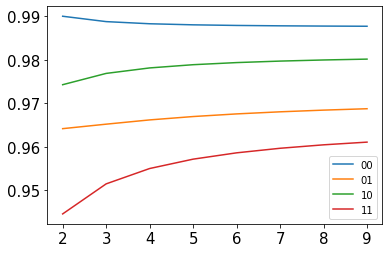

In [180]:
plt.plot(qbits,res_00,label="00")
plt.plot(qbits,res_01,label="01")
plt.plot(qbits,res_10,label="10")
plt.plot(qbits,res_11,label="11")
plt.legend()
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=15)

#plt.savefig("Fidelity_N.png",bbox_inches="tight",dpi=200)

In [3]:
##### Noise on the server's side
N=2

sgma = f.init(N)



# f(sgma,G,qbit,N):

#00
sgmaM_00 = (1-p)*f.f(sgma,h,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_00 = (1-p)*f.f(sgmaM_00,CNOT,[0,1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])

#01
sgmaM_01 = (1-p)*f.f(sgma,h,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_01 = (1-p)*f.f(sgmaM_01,h,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_01 = (1-p)*f.f(sgmaM_01,pi8,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_01 = (1-p)*f.f(sgmaM_01,pi8,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_01 = (1-p)*f.f(sgmaM_01,pi8,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_01 = (1-p)*f.f(sgmaM_01,pi8,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_01 = (1-p)*f.f(sgmaM_01,h,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_01 = (1-p)*f.f(sgmaM_01,CNOT,[0,1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])

#10
sgmaM_10 = (1-p)*f.f(sgma,h,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_10 = (1-p)*f.f(sgmaM_10,pi8,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_10 = (1-p)*f.f(sgmaM_10,pi8,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_10 = (1-p)*f.f(sgmaM_10,pi8,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_10 = (1-p)*f.f(sgmaM_10,pi8,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_10 = (1-p)*f.f(sgmaM_10,CNOT,[0,1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])

#11
sgmaM_11 = (1-p)*f.f(sgma,h,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,pi8,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,pi8,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,pi8,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,pi8,[0],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,h,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,pi8,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,pi8,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,pi8,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,pi8,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,h,[1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaM_11 = (1-p)*f.f(sgmaM_11,CNOT,[0,1],N)+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])

resM=[f.fidelity(clean_vec_00,sgmaM_00,N).real,f.fidelity(clean_vec_01,sgmaM_01,N).real,f.fidelity(clean_vec_10,sgmaM_10,N).real,f.fidelity(clean_vec_11,sgmaM_11,N).real]

In [4]:
# Noise on both

#00
sgmaAM_00 = (1-p)*sgmaM_00+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_00 = (1-p)*sgmaAM_00+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])

#01
sgmaAM_01 = (1-p)*sgmaM_01+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_01 = (1-p)*sgmaAM_01+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_01 = (1-p)*sgmaAM_01+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_01 = (1-p)*sgmaAM_01+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_01 = (1-p)*sgmaAM_01+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_01 = (1-p)*sgmaAM_01+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_01 = (1-p)*sgmaAM_01+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_01 = (1-p)*sgmaAM_01+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])

#10
sgmaAM_10 = (1-p)*sgmaM_10+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_10 = (1-p)*sgmaAM_10+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_10 = (1-p)*sgmaAM_10+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_10 = (1-p)*sgmaAM_10+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_10 = (1-p)*sgmaAM_10+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_10 = (1-p)*sgmaAM_10+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])

#11
sgmaAM_11 = (1-p)*sgmaM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])
sgmaAM_11 = (1-p)*sgmaAM_11+(p/2**N)*np.identity(2**N).reshape([2 for i in range(2**N)])



resAM=[f.fidelity(clean_vec_00,sgmaAM_00,N).real,f.fidelity(clean_vec_01,sgmaAM_01,N).real,f.fidelity(clean_vec_10,sgmaAM_10,N).real,f.fidelity(clean_vec_11,sgmaAM_11,N).real]

print(resA[0],resM[0],resAM[0])

0.9900430555555553 0.9850749999999996 0.9704470074999995


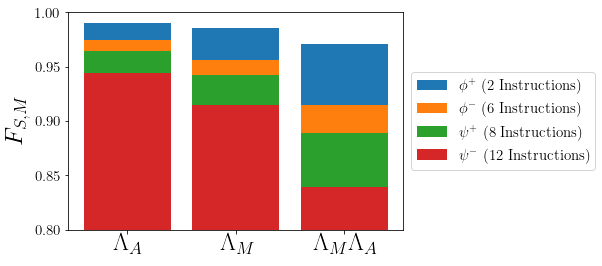

In [8]:
F00=[resA[0],resM[0],resAM[0]]
F01=[resA[1],resM[1],resAM[1]]
F10=[resA[2],resM[2],resAM[2]]
F11=[resA[3],resM[3],resAM[3]]

plt.bar(["$\Lambda_A$","$\Lambda_M$","$\Lambda_M\Lambda_A$"],F00,label="$\phi^+$    (2   Instructions)")
plt.bar(["$\Lambda_A$","$\Lambda_M$","$\Lambda_M\Lambda_A$"],F10,label="$\phi^-$    (6   Instructions)")
plt.bar(["$\Lambda_A$","$\Lambda_M$","$\Lambda_M\Lambda_A$"],F01,label="$\psi^+$    (8   Instructions)")
plt.bar(["$\Lambda_A$","$\Lambda_M$","$\Lambda_M\Lambda_A$"],F11,label="$\psi^-$    (12 Instructions)")

plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.ylabel("$F_{S,M}$",fontsize=25)
plt.ylim(.8,1)

#plt.savefig("Fidelity.png",bbox_inches="tight",dpi=200)


In [7]:
print(F11[0],F11[1],F11[2])

0.9445423016136603 0.914788653787096 0.8392586056054132
